# FDA_HOMEWORK 3
by 交管108_張仲宇_H54046070

## Part 1: Logistic Regression

In [1]:
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, model_selection
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import random

### 資料處理

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


---
原始資料檔內並沒有交易量增減的欄位，所以接下來必須先判斷增減，

因為是要預測的關係，所以我們想知道的是用第n天的資料，可不可以判斷第n+1天的增減，

所以第n天的增減一欄顯示的是第n+1天與第n天比起來是增或減。

---

In [4]:
for i in range(len(data)-1):
    if data.loc[i, 'Volume'] < data.loc[i+1, 'Volume']:
        data.loc[i, 'Movement'] = 1
    else:
        data.loc[i, 'Movement'] = 0
data = data.drop(len(data)-1)    # 去掉最後一row

In [5]:
data.tail()

,Date,Open Price,Close Price,High Price,Low Price,Volume,Movement
2510,21-Dec-2018,2465.38,2416.62,2504.41,2408.55,4560164352,0.0
2511,24-Dec-2018,2400.56,2351.10,2410.34,2351.10,1662758784,1.0
2512,26-Dec-2018,2363.12,2467.70,2467.76,2346.58,2611875072,0.0
2513,27-Dec-2018,2442.50,2488.83,2489.10,2397.94,2386466304,0.0
2514,28-Dec-2018,2498.77,2485.74,2520.27,2472.89,2080726656,0.0


在Movement欄位中，1代表下一天的交易量會增加，0代表會減少。
因為最後一天不會有值，所以我把他去掉。

---

### 切割檔案
接下來將檔案依照日期分成train, test，2018年以後的為test。

然後分別切割成x, y。

In [6]:
data['Date']=pd.to_datetime(data['Date']) # 轉為日期格式
train = data[data['Date'] <= pd.datetime(2017,12,31)].drop(['Date'], axis=1) # 日期在2018前的設為train
test = data[data['Date'] > pd.datetime(2017,12,31)].drop(['Date'], axis=1)   # 日期在2018後的設為test

In [7]:
x_train = train.loc[:, train.columns != 'Movement']
y_train = train['Movement']
x_test = test.loc[:, test.columns != 'Movement']
y_test = test['Movement']

### 視覺化檢視變數與交易量增減的關係

In [8]:
def plot_feature(data, feature_name):
    plt.figure(figsize=(10, 3))
    plt.scatter(data[feature_name], data['Movement'], alpha=0.2)
    plt.xlabel(feature_name)
    plt.ylabel('Movement')
    plt.show()

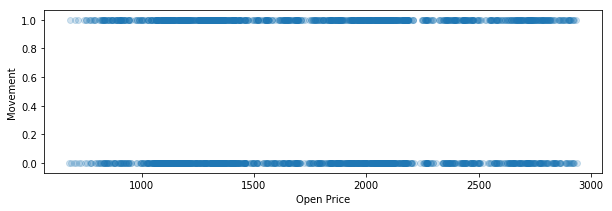

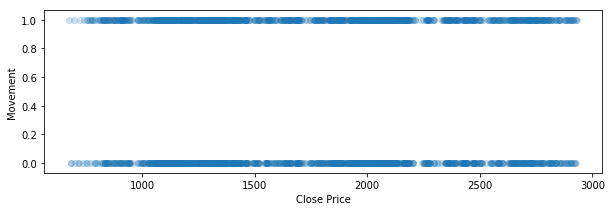

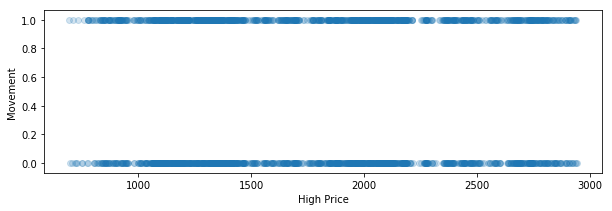

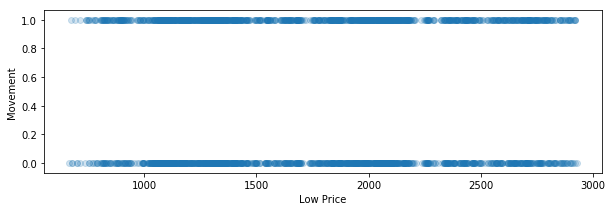

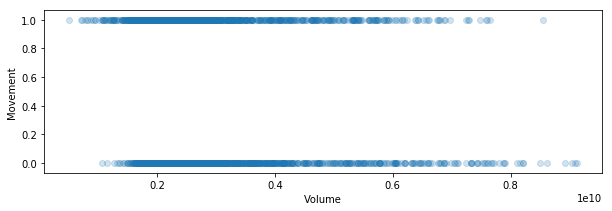

In [9]:
names = ['Open Price', 'Close Price', 'High Price', 'Low Price', 'Volume']
plot_feature(data, 'Open Price')
plot_feature(data, 'Close Price')
plot_feature(data, 'High Price')
plot_feature(data, 'Low Price')
plot_feature(data, 'Volume')

從上面幾張圖看起來，並沒有呈現明顯的分類關係，不過為了做作業，還是得繼續使用分類器來分類QQ

---
接下來將資料套入羅吉斯迴歸中：

In [10]:
def evaluate(model, x_train, y_train, x_test, y_test):
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    train_acc = metrics.accuracy_score(y_train, train_preds)
    test_acc = metrics.accuracy_score(y_test, test_preds)
    print('Train accuracy: %s' % train_acc)
    print('Test accuracy: %s' % test_acc)

In [11]:
model = LogisticRegression().fit(x_train, y_train)
evaluate(model, x_train, y_train, x_test, y_test)

Train accuracy: 0.5004416961130742
Test accuracy: 0.4860557768924303


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Logistic Regression小結
看起來準確率很低，甚至比隨便猜（機率=0.5）還要低...<br />

從上面畫出來的圖散佈得這麼平均就可以知道這種2分的切割不OK，<br />
所以接下來使用其他方法看看能不能提升準確率。

---

## Part 2: SVM
---
### 資料標準化
因為上面已經將資料切分成train, test了，所以接下來我先進行資料的標準化。

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


### 套入SVC

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [14]:
penalty = 0.05

svm = SVC(C=penalty, kernel="linear")
svm.fit(x_train_std, y_train)

acc_train = accuracy_score(y_train, svm.predict(x_train_std)) * 100
acc_test = accuracy_score(y_test, svm.predict(x_test_std)) * 100
print("Penalty = %.2f, Train accuracy = %.2f %%, Test accuracy = %.2f %%" % (penalty, acc_train, acc_test))

Penalty = 0.05, Train accuracy = 55.74 %, Test accuracy = 49.40 %


---
可以看到，精準度還是比用猜的還要低。
但下來還是要努力改一些參數看看是否能夠提升精準度。

而視覺化的部分因為維度大於3的關係，所以這邊我就偷懶先省略。

再來我使用迴圈，測試從0.01到3之間哪個penalty與kernel function的準確率最高，將他們畫成圖且將最高準確度的penalty印出來。

---

### 不同Penalty與Kernel Function測試

### kernel="linear"

In [15]:
data_plt = pd.DataFrame(columns=('penalty', 'acc_train', 'acc_test'))
count = 0
for i in np.linspace(start=0.01, stop=3, num=50):
    penalty = i
    
    svm = SVC(C=penalty, kernel="linear")
    svm.fit(x_train_std, y_train)

    acc_train = accuracy_score(y_train, svm.predict(x_train_std)) * 100
    acc_test = accuracy_score(y_test, svm.predict(x_test_std)) * 100
    data_plt.loc[count] = [penalty, acc_train, acc_test]
    count += 1

The Best Accuracy:
   penalty  acc_train   acc_test
0     0.01  55.388693  50.199203


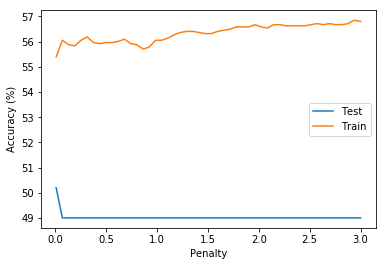

In [16]:
plt.xlabel('Penalty')
plt.ylabel('Accuracy (%)')

plt.plot(data_plt['penalty'], data_plt['acc_test'], label='Test')
plt.plot(data_plt['penalty'], data_plt['acc_train'], label='Train')
plt.legend()
print('The Best Accuracy:')
print(data_plt[data_plt['acc_test'] == data_plt['acc_test'].max()])

### kernel="poly"

In [17]:
data_plt = pd.DataFrame(columns=('penalty', 'acc_train', 'acc_test'))
count = 0
for i in np.linspace(start=0.01, stop=3, num=50):
    penalty = i
    
    svm = SVC(C=penalty, kernel="poly")
    svm.fit(x_train_std, y_train)

    acc_train = accuracy_score(y_train, svm.predict(x_train_std)) * 100
    acc_test = accuracy_score(y_test, svm.predict(x_test_std)) * 100
    data_plt.loc[count] = [penalty, acc_train, acc_test]
    count += 1

The Best Accuracy:
     penalty  acc_train   acc_test
1   0.071020  52.826855  49.800797
2   0.132041  52.826855  49.800797
3   0.193061  53.003534  49.800797
4   0.254082  53.136042  49.800797
5   0.315102  53.047703  49.800797
6   0.376122  53.268551  49.800797
7   0.437143  53.401060  49.800797
8   0.498163  53.533569  49.800797
9   0.559184  53.577739  49.800797
10  0.620204  53.533569  49.800797
11  0.681224  53.621908  49.800797
12  0.742245  53.666078  49.800797
13  0.803265  53.710247  49.800797
14  0.864286  53.931095  49.800797
15  0.925306  53.710247  49.800797
16  0.986327  54.107774  49.800797
17  1.047347  54.063604  49.800797
18  1.108367  54.019435  49.800797
19  1.169388  53.975265  49.800797
20  1.230408  53.975265  49.800797
21  1.291429  53.975265  49.800797
22  1.352449  53.931095  49.800797
23  1.413469  53.931095  49.800797
24  1.474490  54.019435  49.800797
25  1.535510  54.019435  49.800797
26  1.596531  54.107774  49.800797
27  1.657551  54.151943  49.800797
2

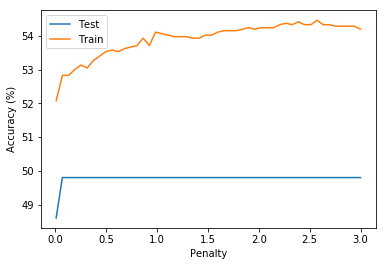

In [18]:
plt.xlabel('Penalty')
plt.ylabel('Accuracy (%)')

plt.plot(data_plt['penalty'], data_plt['acc_test'], label='Test')
plt.plot(data_plt['penalty'], data_plt['acc_train'], label='Train')
plt.legend()
print('The Best Accuracy:')
print(data_plt[data_plt['acc_test'] == data_plt['acc_test'].max()])

### kernel="rbf"

In [19]:
data_plt = pd.DataFrame(columns=('penalty', 'acc_train', 'acc_test'))
count = 0
for i in np.linspace(start=0.01, stop=3, num=50):
    penalty = i
    
    svm = SVC(C=penalty, kernel="rbf")
    svm.fit(x_train_std, y_train)

    acc_train = accuracy_score(y_train, svm.predict(x_train_std)) * 100
    acc_test = accuracy_score(y_test, svm.predict(x_test_std)) * 100
    data_plt.loc[count] = [penalty, acc_train, acc_test]
    count += 1

The Best Accuracy:
    penalty  acc_train   acc_test
5  0.315102   63.69258  62.549801


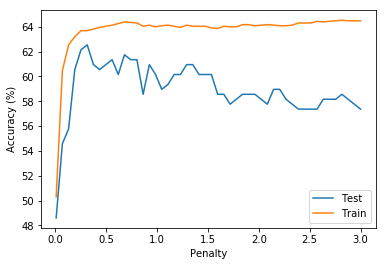

In [20]:
plt.xlabel('Penalty')
plt.ylabel('Accuracy (%)')

plt.plot(data_plt['penalty'], data_plt['acc_test'], label='Test')
plt.plot(data_plt['penalty'], data_plt['acc_train'], label='Train')
plt.legend()
print('The Best Accuracy:')
print(data_plt[data_plt['acc_test'] == data_plt['acc_test'].max()])

### kernel="sigmoid"

In [21]:
data_plt = pd.DataFrame(columns=('penalty', 'acc_train', 'acc_test'))
count = 0
for i in np.linspace(start=0.01, stop=3, num=50):
    penalty = i
    
    svm = SVC(C=penalty, kernel="sigmoid")
    svm.fit(x_train_std, y_train)

    acc_train = accuracy_score(y_train, svm.predict(x_train_std)) * 100
    acc_test = accuracy_score(y_test, svm.predict(x_test_std)) * 100
    data_plt.loc[count] = [penalty, acc_train, acc_test]
    count += 1

The Best Accuracy:
   penalty  acc_train   acc_test
0     0.01  53.312721  51.394422


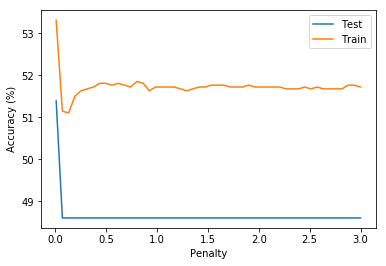

In [22]:
plt.xlabel('Penalty')
plt.ylabel('Accuracy (%)')

plt.plot(data_plt['penalty'], data_plt['acc_test'], label='Test')
plt.plot(data_plt['penalty'], data_plt['acc_train'], label='Train')
plt.legend()
print('The Best Accuracy:')
print(data_plt[data_plt['acc_test'] == data_plt['acc_test'].max()])

### SVM小結
從以上幾種kernel function所畫出來的圖可以看到過了一定的penalty後，準確率就差不多不會有更大的變動了，後面呈現一條直線。<br />


四種不同kernel function所得到的最高準確率分別為50.199203、49.800797、62.549801與51.394422，<br />
其中以RBF函數中，penalty設為0.315102得到最高的準確率（62.549801）！<br />
比目前為止其他方法足足高出10個百分點，讓人**痛哭流涕**。<br />

在這個問題上，用較小的penalty（soft margin）可以得到較高的精準度，<br />
就跟上面圖表畫出來一樣，可能是因為這個股市資料集並沒有一個明顯的分別，<br />
所以給予較高的彈性當然就能把hyperplane畫得比較fit一點，<br />
但也要考慮到這個資料是不是真的適合去預測，又或者只是在找一個overfitting的方法。

---

## Part 3: Neural Network

In [23]:
from keras import models, layers, optimizers, regularizers
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm

Using TensorFlow backend.


在這邊我直接使用上面標準化過的train, test資料， <br />
這樣子係數才不會受到過大的值影響。

In [24]:
print(x_train_std)
print(x_test_std)

[[-1.55230001 -1.49441197 -1.50545617 -1.54093327  0.81362581]
 [-1.49834121 -1.50337884 -1.50153623 -1.49936521  1.82418053]
 [-1.49421907 -1.48843406 -1.48664047 -1.48340126  1.80842623]
 ...
 [ 2.1145693   2.11464105  2.10688987  2.1247189  -1.33171387]
 [ 2.12281357  2.12478289  2.11105738  2.13250518 -1.34874724]
 [ 2.12909984  2.09606828  2.12025892  2.11380162 -1.19609981]]
[[ 2.11792884  2.14183026  2.1280369   2.13182543 -0.81568088]
 [ 2.14703114  2.17738855  2.16616345  2.16356794 -0.6350265 ]
 [ 2.19126169  2.1999191   2.19694528  2.20744305 -0.62749905]
 ...
 [ 1.45712936  1.67161568  1.65737622  1.44016418 -0.24928668]
 [ 1.62073705  1.71517201  1.7014033   1.54595882 -0.41608606]
 [ 1.73671343  1.70880244  1.76571091  1.70034565 -0.64232918]]


### 設定神經網路基本架構
這邊先用和助教的教學一樣的設定跑跑看，感謝助教。

In [25]:
hidden_units = 10
activation = 'relu'
l2 = 0.001
learning_rate = 0.1
epochs = 20
batch_size = 32  

In [26]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=5,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### 設定權重
訓練資料裡有1131筆結果為1，這雖然和0的數量差不多，不過還是設定一下。

In [27]:
class_weight = {
    0: 1.,
    1: 1131 / 2264
}

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
2264/2264 [==============================] - 0s 208us/step - loss: 0.4776 - acc: 0.5269
Epoch 2/20
2264/2264 [==============================] - 0s 50us/step - loss: 0.4683 - acc: 0.5278
Epoch 3/20
2264/2264 [==============================] - 0s 45us/step - loss: 0.4597 - acc: 0.5402
Epoch 4/20
2264/2264 [==============================] - 0s 48us/step - loss: 0.4698 - acc: 0.5380
Epoch 5/20
2264/2264 [==============================] - 0s 62us/step - loss: 0.4586 - acc: 0.5451
Epoch 6/20
2264/2264 [==============================] - 0s 69us/step - loss: 0.4677 - acc: 0.5402
Epoch 7/20
2264/2264 [==============================] - 0s 50us/step - loss: 0.4643 - acc: 0.5424
Epoch 8/20
2264/2264 [==============================] - 0s 52us/step - loss: 0.4650 - acc: 0.5349
Epoch 9/20
2264/2264 [==============================] - 0s 50us/step - loss: 0.4721 - acc: 0.5243
Epoch 10/20
2264/2264 [==============================] - 0s 56us/step

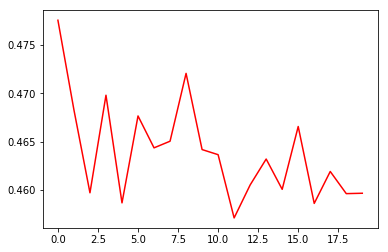

In [28]:
# train the parameters
history = model.fit(x_train_std, y_train, epochs=epochs, batch_size=batch_size, class_weight=class_weight)

# evaluate accuracy
train_acc = model.evaluate(x_train_std, y_train, batch_size=batch_size)[1]
test_acc = model.evaluate(x_test_std, y_test, batch_size=batch_size)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

上面是訓練一次的結果，雖然訓練集的準確率有0.54，但看訓練集是不準的，因為我們就是用訓練集去訓練出來的。<br />
測試集的準確率只有0.48，比0.5還要低，跟上面使用羅吉斯迴歸和SVM的初步結果差不多慘。

---
因為只跑一次所得結果會有變異的問題，所以最好是多跑幾次，然後取平均值， <br />
接下來就多跑幾次，取平均準確率，比較能夠讓人信服。

In [29]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=20):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(
                x_train, 
                y_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                class_weight=class_weight, 
                verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print('Avgerage Training Accuracy: %s' % np.average(train_accs))
    print('Avgerage Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs

In [30]:
_, test_accs = train_and_evaluate(model, x_train_std, y_train, x_test_std, y_test)

100%|██████████| 20/20 [00:41<00:00,  1.87s/it]

Avgerage Training Accuracy: 0.5412544170559084
Avgerage Testing Accuracy: 0.492031873352974


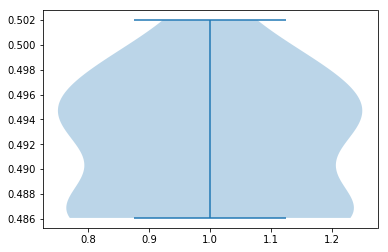

In [31]:
plt.violinplot(test_accs)
plt.show()

In [32]:
print('Min: %s' % np.min(test_accs))
print('Max: %s' % np.max(test_accs))

Min: 0.48605577570508673
Max: 0.5019920323474474


跑了20次可以得到平均的準確率，雖然差不了多少，但是解釋力強多了。 <br/>
從violin plot可以觀察到這20次的分佈以及變異，也可以印出其中最大及最小的準確率。 <br/>
可以發現在低準確率的部分的分布比較廣，變異較大。

---

### 增加準確率
為了提升準確率，接下來嘗試更改參數，看看怎樣能夠得到最高準確率。

In [33]:
hidden_units = 10
activation = 'relu'
l2 = 0.01
learning_rate = 0.1
epochs = 50
batch_size = 32

In [34]:
def build_model(hidden_units, activation, learning_rate):
    model = models.Sequential()
    model.add(layers.Dense(input_dim=5,
                           units=hidden_units, 
                           activation=activation,
                           kernel_regularizer=regularizers.l2(l2)))
    model.add(layers.Dense(input_dim=hidden_units,
                           units=1,
                           activation='sigmoid',
                           kernel_regularizer=regularizers.l2(l2)))
    model.compile(loss='binary_crossentropy',
                  # Adam is a kind of gradient descent
                  optimizer=optimizers.Adam(lr=learning_rate),
                  metrics=['accuracy'])
    return model

In [35]:
_, __ = train_and_evaluate(model, x_train_std, y_train, x_test_std, y_test)

100%|██████████| 20/20 [01:37<00:00,  4.53s/it]

Avgerage Training Accuracy: 0.5396863957913098
Avgerage Testing Accuracy: 0.49820717300076883


這邊我以上面的參數作為參考基準，看看接下來都只更動一個參數能不能提升準確度。

---
為了使版面整潔，稍微修改一下function，才不會印出很多進度條。

In [36]:
def train_and_evaluate_2(model, x_train, y_train, x_test, y_test, n=20):
    train_accs = []
    test_accs = []
    for _ in range(n):
        model.fit(
            x_train, 
            y_train, 
            epochs=epochs, 
            batch_size=batch_size, 
            class_weight=class_weight, 
            verbose=False)
        train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
        test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
    return train_accs, test_accs

In [37]:
def plot_result(data_plt, x_parameter):
    plt.xlabel(x_parameter)
    plt.ylabel('Accuracy')

    plt.plot(data_plt[x_parameter], data_plt['acc_test'], label='Test')
    plt.plot(data_plt[x_parameter], data_plt['acc_train'], label='Train')
    plt.legend()
    print('The Best Testing Accuracy:')
    print(data_plt[data_plt['acc_test'] == data_plt['acc_test'].max()])

---
### 更改 hidden units
然後這邊都只跑5次，取其準確率平均。 <br />
*但是我發現每個都跑5次也是要跑很久，會做不完，視情況跑1次就好ＱＱ

In [38]:
data_plt = pd.DataFrame(columns=('hidden units', 'acc_train', 'acc_test'))
count = 0

for i in range(10, 36, 5):
    hidden_units = i
    activation = 'relu'
    l2 = 0.01
    learning_rate = 0.05
    epochs = 50
    batch_size = 32
    
    model = build_model(hidden_units, activation, learning_rate)

    accu = train_and_evaluate_2(model, x_train_std, y_train, x_test_std, y_test, n=1)
    
    acc_train = np.mean(accu[0])
    acc_test = np.mean(accu[1])
    data_plt.loc[count] = [hidden_units, acc_train, acc_test]
    
    count += 1

The Best Testing Accuracy:
   hidden units  acc_train  acc_test
0          10.0   0.500442  0.486056
1          15.0   0.500442  0.486056
2          20.0   0.500442  0.486056
3          25.0   0.500442  0.486056
4          30.0   0.500442  0.486056
5          35.0   0.500442  0.486056


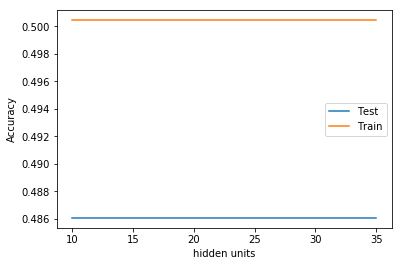

In [39]:
plot_result(data_plt, 'hidden units')

---
### 更改 l2（penalty）

In [40]:
data_plt = pd.DataFrame(columns=('l2', 'acc_train', 'acc_test'))
count = 0

for i in np.arange(0.001, 0.09, 0.01):
    hidden_units = 10
    activation = 'relu'
    l2 = i
    learning_rate = 0.05
    epochs = 50
    batch_size = 32
    
    model = build_model(hidden_units, activation, learning_rate)

    accu = train_and_evaluate_2(model, x_train_std, y_train, x_test_std, y_test, n=1)
    
    acc_train = np.mean(accu[0])
    acc_test = np.mean(accu[1])
    data_plt.loc[count] = [l2, acc_train, acc_test]
    
    count += 1

The Best Testing Accuracy:
      l2  acc_train  acc_test
0  0.001   0.533569  0.494024


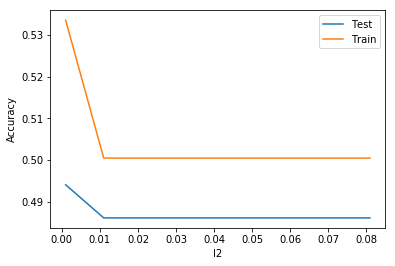

In [41]:
plot_result(data_plt, 'l2')

### 更改 learning rate

In [42]:
data_plt = pd.DataFrame(columns=('learning rate', 'acc_train', 'acc_test'))
count = 0

for i in np.arange(0.01, 0.5, 0.05):
    hidden_units = 10
    activation = 'relu'
    l2 = 0.01
    learning_rate = i
    epochs = 50
    batch_size = 32
    
    model = build_model(hidden_units, activation, learning_rate)

    accu = train_and_evaluate_2(model, x_train_std, y_train, x_test_std, y_test, n=1)
    
    acc_train = np.mean(accu[0])
    acc_test = np.mean(accu[1])
    data_plt.loc[count] = [learning_rate, acc_train, acc_test]
    
    count += 1

The Best Testing Accuracy:
   learning rate  acc_train  acc_test
0           0.01   0.500442  0.486056
1           0.06   0.500442  0.486056
2           0.11   0.500442  0.486056
3           0.16   0.500442  0.486056
4           0.21   0.500442  0.486056
5           0.26   0.500442  0.486056
6           0.31   0.500442  0.486056
7           0.36   0.500442  0.486056
8           0.41   0.500442  0.486056
9           0.46   0.500442  0.486056


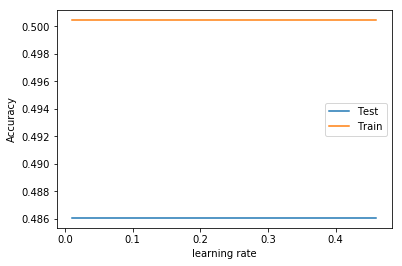

In [43]:
plot_result(data_plt, 'learning rate')

### 更改 epochs

In [45]:
data_plt = pd.DataFrame(columns=('epochs', 'acc_train', 'acc_test'))
count = 0

for i in np.arange(10, 60, 10):
    hidden_units = 10
    activation = 'relu'
    l2 = 0.01
    learning_rate = 0.05
    epochs = i
    batch_size = 32
    
    model = build_model(hidden_units, activation, learning_rate)

    accu = train_and_evaluate_2(model, x_train_std, y_train, x_test_std, y_test, n=1)
    
    acc_train = np.mean(accu[0])
    acc_test = np.mean(accu[1])
    data_plt.loc[count] = [epochs, acc_train, acc_test]
    
    count += 1

The Best Testing Accuracy:
   epochs  acc_train  acc_test
0    10.0   0.500442  0.486056
1    20.0   0.500442  0.486056
2    30.0   0.500442  0.486056
3    40.0   0.500442  0.486056
4    50.0   0.500442  0.486056


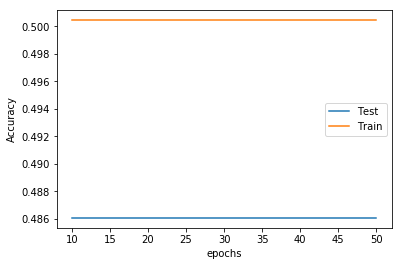

In [46]:
plot_result(data_plt, 'epochs')

### 更改 batch size

In [47]:
data_plt = pd.DataFrame(columns=('batch size', 'acc_train', 'acc_test'))
count = 0

for i in np.arange(10, 51, 5):
    hidden_units = 10
    activation = 'relu'
    l2 = 0.01
    learning_rate = 0.05
    epochs = 50
    batch_size = i
    
    model = build_model(hidden_units, activation, learning_rate)

    accu = train_and_evaluate_2(model, x_train_std, y_train, x_test_std, y_test, n=1)
    
    acc_train = np.mean(accu[0])
    acc_test = np.mean(accu[1])
    data_plt.loc[count] = [batch_size, acc_train, acc_test]
    
    count += 1

The Best Testing Accuracy:
   batch size  acc_train  acc_test
0        10.0   0.500442  0.486056
1        15.0   0.500442  0.486056
2        20.0   0.500442  0.486056
3        25.0   0.500442  0.486056
4        30.0   0.500442  0.486056
5        35.0   0.500442  0.486056
6        40.0   0.500442  0.486056
7        45.0   0.500442  0.486056
8        50.0   0.500442  0.486056


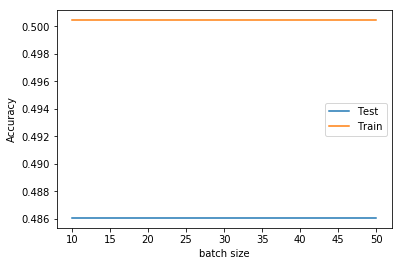

In [48]:
plot_result(data_plt, 'batch size')

### 更改 activation

In [49]:
hidden_units = 10
activation = 'sigmoid'
l2 = 0.01
learning_rate = 0.05
epochs = 50
batch_size = 32
    
model = build_model(hidden_units, activation, learning_rate)

accu = train_and_evaluate_2(model, x_train_std, y_train, x_test_std, y_test, n=1)

print('Avgerage Training Accuracy:', np.mean(accu[0]))
print('Avgerage Testing Accuracy:', np.mean(accu[1]))

Avgerage Training Accuracy: 0.5004416961130742
Avgerage Testing Accuracy: 0.48605577570508673


In [50]:
hidden_units = 10
activation = 'tanh'
l2 = 0.01
learning_rate = 0.05
epochs = 50
batch_size = 32
    
model = build_model(hidden_units, activation, learning_rate)

accu = train_and_evaluate_2(model, x_train_std, y_train, x_test_std, y_test, n=1)

print('Avgerage Training Accuracy:', np.mean(accu[0]))
print('Avgerage Testing Accuracy:', np.mean(accu[1]))

Avgerage Training Accuracy: 0.5004416961130742
Avgerage Testing Accuracy: 0.48605577570508673


**看起來，都ㄧ樣** <br />
而且都呈現一直線，想要將個別最好的參數放在一起好像也沒意義，因為跟比較基準一樣。 <br />

---

### 增加神經網路中的layer

In [51]:
def build_model_2(hidden_units, activation, learning_rate):
    model = models.Sequential()
    model.add(layers.Dense(input_dim=5,
                           units=hidden_units, 
                           activation=activation,
                           kernel_regularizer=regularizers.l2(l2)))
    model.add(layers.Dense(input_dim=hidden_units,
                           units=5,
                           activation='sigmoid',
                           kernel_regularizer=regularizers.l2(l2)))
    model.add(layers.Dense(input_dim=5,
                           units=1,
                           activation='sigmoid',
                           kernel_regularizer=regularizers.l2(l2)))
    model.compile(loss='binary_crossentropy',
                  # Adam is a kind of gradient descent
                  optimizer=optimizers.Adam(lr=learning_rate),
                  metrics=['accuracy'])
    return model

In [52]:
hidden_units = 10
activation = 'relu'
l2 = 0.01
learning_rate = 0.05
epochs = 50
batch_size = 32
    
model = build_model_2(hidden_units, activation, learning_rate)

accu = train_and_evaluate(model, x_train_std, y_train, x_test_std, y_test, n=5)

100%|██████████| 5/5 [00:43<00:00,  8.78s/it]

Avgerage Training Accuracy: 0.5004416961130742
Avgerage Testing Accuracy: 0.48605577570508673


### Neural Network 小結
不管是更改神經網路中個別參數或是增加layer都無法有效增加準確率， <br />
看來這一個資料並不適合使用神經網路來預測。 <br />
有可能是這個問題本身就不是一個可以預測的問題，也有可能是神經網路根本就不是為這類問題而生。

---
---

## 總結
這份作業使用標普500指數中開盤價、收盤價、最高價、最低價、當日交易量來預測隔日交易量增減， <br />
總共使用了三種機器學習的方法，分別是Logistic Regression、SVM和Neural Network， <br />
用2009年到2017年的資料來訓練並預測2018年。

---
總體來看，使用羅吉斯迴歸和神經網路的結果都不甚理想，準確率都無法穩定的超過0.5， <br />
而使用SVM中kernel=rbf的情況下準確率則能夠到達60%。 <br />

但是我覺得這個本身就不是一個適合預測的問題，或者應該說，就我們現有的資料來看，根本不可能作出多精準的預測，<br />
能夠掌握內線交易的人都不一定說得準了，更何況是只能掌握五個參數。 <br />
股市的變化會受到非常非常多的因素影響，又或者是根本沒有規律， <br />
也許需要掌握更多變因與更長時間資料後就能夠增進一些準確率。

---
用了那麼多方法後雖然不能保證完全理解其中原理， <br />
但對於應用的熟悉度來說真的大大提升。